# Motivation for function optimization

Let's say I have two numbers I need to choose, $x$ and $y$, that determine a function $f(x,y)$ that I want to minimize. E.g. $f(x,y)$ could be the cost of a product I will be putting to market and $x$ and $y$ could be certain dimensions of the product, or one could be price. 

Or $f(x,y)$ could be the error with which a model with parameters $x$ and $y$ predicts the stock-market. 

Please think of one other situation when you would want to minimize a multi-variable function. 

# Example

Say

$$f(x,y) = x^2 + 2y^2 + 4x + y + 6$$

and we want to find the $(x,y)$ that minimizes $f(x,y)$. 

Let's first visualize the function: 

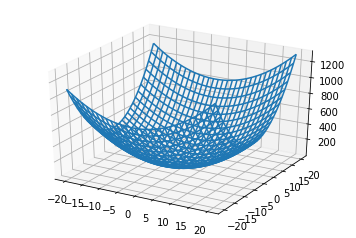

In [1]:
import numpy as np

f = lambda x, y: x*x + 2*y*y + 4*x + y + 6

x = np.linspace(-20,20,300)
y = np.linspace(-20,20,300)
X, Y = np.meshgrid(x,y)
Z = f(X, Y)

# I copy-pasted the following code from matplotlib documentation 
# and modified it to graph f.
# You don't need to know how to make 3d graphs

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
% matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

# Ways to minimize a function 

So how do we find the $(x,y)$ that minimizes the function $f$? Here are three ideas, all of which work for our case. 

### Exhaustive search 

Try a bunch of random values of $x$ and $y$. Keep the $x,y$ with the smallest values seen.

Not a bad idea in 2-dimensions. But will it work if $f$ were $f(x_1,x_2,x_3,..., x_{100})$ with lots of variables instead of just two? No, because there are too many points to look at.

### Solve equations

Look at the partial derivatives of $f$ and solve $\frac{\partial f}{\partial x}(x,y) = 0$ and $\frac{\partial f}{\partial y}(x,y) = 0$. The idea here is that at a local mininum, the partial derivatives will all be 0. 

This is great in our case because the partial derivatives are solved easily. But again, if we had lots and lots of variables, e.g. $f(x_1,x_2,x_3,..., x_{100})$, we would have to solve 100 equations, this would be fine if all the partial derivatives were linear, but in general it's very hard to solve lots of non-linear equations. 

### Gradient Descent

Start at a point $(x,y)$ and "go downhill". 

**Fact from calculus:** At any point $(x,y)$, the gradient $\nabla f (x,y) = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})$ will give the direction that makes $f$ increase the most. 

If $\nabla f (x,y)$ will give the direction of steepest ascent, then $- \nabla f (x,y)$ will give the direction of steepest descent. This leads to an algorithm for optimizing a function:

**Algorithm:** Start at a a point and iteratively (i.e. in a loop) change $(x,y)$ to 

$$(x,y) - \eta \nabla f (x,y),$$

where $\eta$ is a "small" number. 

# Gradient descent applied to our example

In [2]:
f = lambda x, y: x*x + 2*y*y + 4*x + y + 6
dfdx = lambda x, y: 2*x + 4 # partial derivative of our function f with respect to x
dfdy = lambda x, y: 4*y + 1 # same, but with respect to y

# starting at (5,5) for no particular reason
x, y = 5, 5

# this is the rate at which we'll move downhill
# this is called the "learning rate" in machine learning
eta = 0.025

# we will record x, y, and f at each step of the algorithm 
x_vals = []
y_vals = []
f_vals = []

num_steps = 200
for i in range(num_steps):
    x = x - eta * dfdx(x, y)
    y = y - eta * dfdy(x, y)
    x_vals.append(x)
    y_vals.append(y)
    f_vals.append(f(x, y))

# Visualizing gradient descent

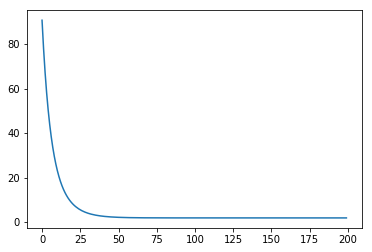

In [3]:
# plot the values f takes at each step of the algorithm
plt.plot(range(num_steps), f_vals)

Let's also visualize what happens on a contour graph. A contour graph of $f(x,y)$ is the set of curves in the $(x,y)$-plane that are the solutions to $f(x,y) = c$ for given values of $c$. 

<a list of 13 text.Text objects>

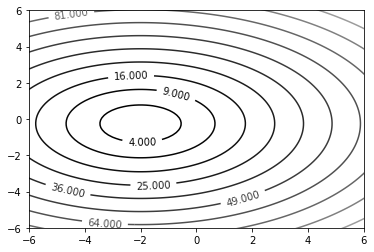

In [4]:
CS = plt.contour(X, Y, Z, [1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196], cmap="gray")
plt.axis([-6,6,-6,6])
plt.clabel(CS, inline=1, fontsize=10)

Let's include some arrows indicating the changes in $x$ and $y$ during gradient descent: 

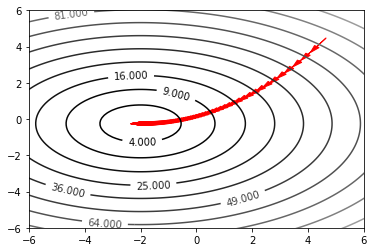

In [5]:
CS = plt.contour(X, Y, Z, [1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196], cmap="gray")
plt.axis([-6,6,-6,6])
plt.clabel(CS, inline=1, fontsize=10)

for i in range(99):
    plt.arrow(x_vals[i], 
              y_vals[i], 
              x_vals[i+1] - x_vals[i], 
              y_vals[i+1] - y_vals[i], 
              head_width=0.2, head_length=0.4, color="red")

So our point $(x,y)$ is really going downhill towards the minimum!

**Exercise**: What happens if you take $\eta$ (`eta`) to be too big? Try guessing what will happen and then go and try `eta = 0.45` in the code. 

# Numerical gradient

The gradient descent method works really well not just for polynomial functions but for all kinds of functions. How do we compute the derivatives in general though? Two ways:

* **Symbolic**: If we know the formula $f$ is, we can take compute the derivative on a sheet of paper. That's what we did above
* **Numerical**: we can numerically approximate the derivative using its definition:
$$\frac{d f}{d x}(x) = \lim_{h \rightarrow 0}\frac{f(x + h) - f(x)}{h}$$
e.g. taking $h = 0.00001$.

In [6]:
def num_derivative(f):
    h = 0.00001
    return (lambda x: (f(x+h)-f(x))/h)

In [7]:
f = lambda x: x*x
num_derivative(f)(1)

2.00001000001393

We can of course do it for partial derivatives:

In [8]:
def dfdx_numerical(f):
    h = 0.00001
    return (lambda x, y: (f(x+h, y)-f(x, y))/h)

def dfdy_numerical(f):
    h = 0.00001
    return (lambda x, y: (f(x, y+h)-f(x, y))/h)


We can then do gradient descent for any function without taking the partial derivatives by hand:

In [9]:
def grad_descent(f, eta=0.02, num_steps=200):
    x, y = 5, 5

    x_vals = []
    y_vals = []
    f_vals = []

    for i in range(num_steps):
        x = x - eta * dfdx_numerical(f)(x,y)
        y = y - eta * dfdy_numerical(f)(x,y)
        x_vals.append(x)
        y_vals.append(y)
        f_vals.append(f(x, y))
    
    return x_vals, y_vals, f_vals

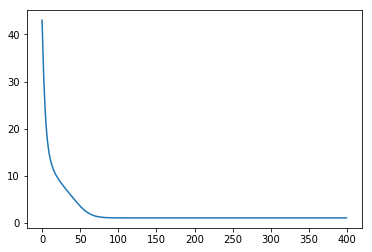

In [10]:
f = lambda x, y: 2*np.sin(x) + x*x + y*y + 5*np.cos(y)
num_steps = 400
x_vals, y_vals, f_vals = grad_descent(f, num_steps=num_steps)

plt.plot(range(num_steps), f_vals)

Let's look at the contour stuff too:

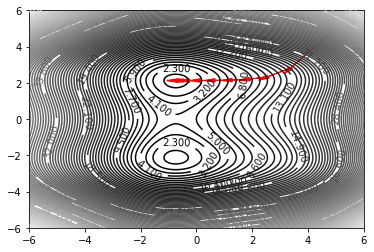

In [11]:
# create a new mesh and corresponding values of f
X = np.linspace(-10,10,300)
Y = np.linspace(-10,10,300)
X, Y = np.meshgrid(X,Y)
Z = f(X, Y)

# create a new contour plot
CS = plt.contour(X, Y, Z, [-4 + 0.9*i for i in range(100)], cmap="gray")
plt.axis([-6,6,-6,6])
plt.clabel(CS, inline=1, fontsize=10)

# finally, draw the arrows
# let's plot every delta_n times to avoid congestion of arrows in the picture
delta_n = 10
for i in range(0,99,delta_n):
    plt.arrow(x_vals[i], 
              y_vals[i], 
              x_vals[i+delta_n] - x_vals[i], 
              y_vals[i+delta_n] - y_vals[i], 
              head_width=0.2, head_length=0.4, color="red")

**Exercise:** $$\frac{f(x + h) - f(x - h)}{2h}$$ will give you a much better estimate of the derivative with the same $h$. Why is it so?